# Часть I: О теореме Байеса

**1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.**


подойдем к этому вопросу как к задаче классической бинарной классификации. Класс 1 - невиновен, класс 0 - виновен. Тогда вероятность принадлежности целевому классу будет:

P(y|x) = $f(x)^{y}$ * $(1-f(x))^{(1-y)}$

При у = 0, получается 
P(y|x) = $f(x)^{0}$ * $(1-f(x))^{(1-0)}$ = ${1}$ * $(1 - f(x))^1$ = ${1}$ * (${1}$-${0.01}$) = ${0.99}$

При у = 1, получается 
P(y|x) = $f(x)^{1}$ * $(1-f(x))^{(1-1)}$ = ${0.01}$ * $(1 - f(x))^0$ = ${0.01}$

Этим интуитивным знанием воспользовался прокурор

Обозначим:

$A$ - подсудимый является убийцей;

$B$ - у подсудимого данная группа крови.

Прокурору нужно было оценить вероятность $P(A|B)$ - вероятность того, что подсудимый является убийцей при условии, что у него данная группа крови.

Если обозначить $P(A)$ - априорную вероятность того, что подсудимый является убийцей (без информации о его группе крови), то по формуле Байеса: $$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B|A)\cdot P(A)+P(B|\bar{A})\cdot P(\bar{A})} = 
\frac{P(A)}{P(A)+0.01\cdot (1 - P(A))}$$ 

Данная вероятность зависит от априорной вероятности того, что подсудимый убийца, и она оказывается высокой даже при низких значениях априорной вероятности (92.5% если $P(A)=0.1$). Тем не менее было бы некорректно делать выводы об убийстве, не проведя анализ крови у других подозреваемых и не учитывая их результаты для подсчёта апостериорной вероятности, ведь если у кого-то ещё из подозреваемых будет обнаружена эта группа крови, то это сильно снизит апостериорную вероятность того, что убийца именно подсудимый.

**2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?**


In [1]:
n = 1_000_000 #количество жителей в городе
k = n * 1 / 100 #количество людей с такой группой крови
ans1 = k / n #должен оценить 
ans2 = 1 / 10_000 #оценил

print(f"адвокат оценил вероятность: {ans2 * 100} %, а должен был оценить: {ans1 * 100}%")

адвокат оценил вероятность: 0.01 %, а должен был оценить: 1.0%


Необходимо сравнивать обвиняемого со всем городом, а не с людьми с такой же группой крови

**3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?**


In [2]:
def false_positive(x):
    return (1 - x) * 0.01 / ((1 - x) * 0.01 + 0.05 * 0.99)

def false_negative(x):
    return 0.95 * 0.01 / (0.95 * 0.01 + x * 0.99)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.arange(0.0, 0.06, 0.01)

y1 = false_positive(x)
y2 = false_negative(x)

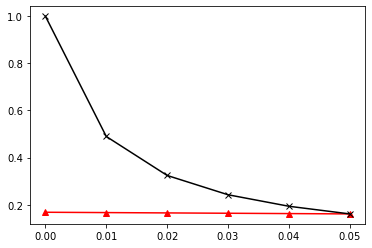

In [5]:
plt.plot(x, y1, c = 'red', marker = '^')
plt.plot(x, y2, c = 'black', marker = 'x');

Уменьшение вероятности false negative поможет быть более уверенными, что в случае отрицательного теста тестируемый действительно здоров, но почти не увеличит уверенность в болезни у человека с положительным тестом. Уменьшение вероятности false positive поможет быть более уверенными, что в случае положительного теста тестируемый действительно болен, но почти не увеличит уверенность в том, что он здоров, если тест отрицательный.

Таким образом, рекомендации будут зависить от целей врачей. Если важнее пропускать как можно меньше заражённых (на данный момент это около 5 человек на 10000 отрицательных тестов), то стоит уменьшать вероятность false negative.
Если же важнее, чтобы было меньше здоровых людей, у которых тест обнаруживает вирус, то следует уменьшать вероятность false positive. На данный момент почти 84% людей с положительным тестом на самом деле здоровы, так что это кажется более важной задачей, так как большое количество ресурсов тратится на на самом деле здоровых людей, которым помощь не нужна, и меньше ресурсов остаётся на действительно заражённых.

# Часть II: О линейной регрессии

### Используемые библиотеки

In [6]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters

### Предобработка датафрейма

In [7]:
register_matplotlib_converters()

In [114]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=['date'])

In [9]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [10]:
#Выберем страну
df_ru = df[df['location'] == 'Russia']

In [11]:
# зададим дату начала отчета
df_ru_march = df_ru[df_ru['date'] >= '2020-03-03']

In [12]:
data = df_ru_march.loc[:, ['total_cases', 'new_cases','date']]

In [13]:
# заменим "0" на "1"
tmp = data['new_cases'] == 0
data.loc[tmp, 'new_cases'] = 1

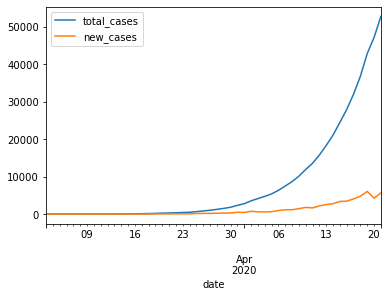

In [14]:
data[:50].set_index('date').plot()

In [15]:
# логарифмируем total_cases и new_cases
data['total_log'] = np.log(data['total_cases'])
data['new_log'] = np.log(data['new_cases'])


In [16]:
# преобразуем дату в дни
data['day'] = (data['date'] - data['date'].min()).dt.days + 1

In [17]:
train, test = data[:50], data[50:]

In [18]:
tmp = train.drop(columns=['total_cases', 'new_cases', 'date'])

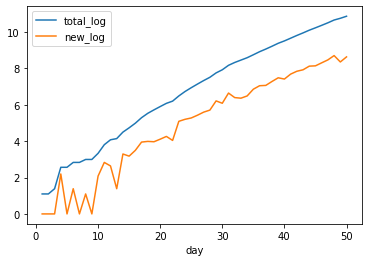

In [19]:
tmp.set_index('day').plot()

### Построение линейной модели

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [21]:
lr = LinearRegression()

# обработаем трейн
X_train = np.array(train['day'][:]).reshape(-1, 1)
y_train = train['total_log']

# обработает тест
X_test = np.array(test['day'][:]).reshape(-1, 1)
y_test = test['total_log']

X_all = np.concatenate([X_train,X_test], axis = 0)
y_all = np.concatenate([y_train,y_test], axis = 0)

# обучим модель
lr.fit(X_train, y_train)

w10, w00 = lr.coef_[0], lr.intercept_

In [22]:
lr_score = lr.score(X_train, y_train)
print('coefficient of determination:', lr_score)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_[0])

coefficient of determination: 0.985339421227631
intercept: 1.62244623644881
slope: 0.19829091233588567


MSE train: 0.12183046154391235
MSE test: 999.3889031216294
MSE train (in terms of exp):  105752940.80696297
MSE test (in terms of exp):  1.5359547365758899e+59


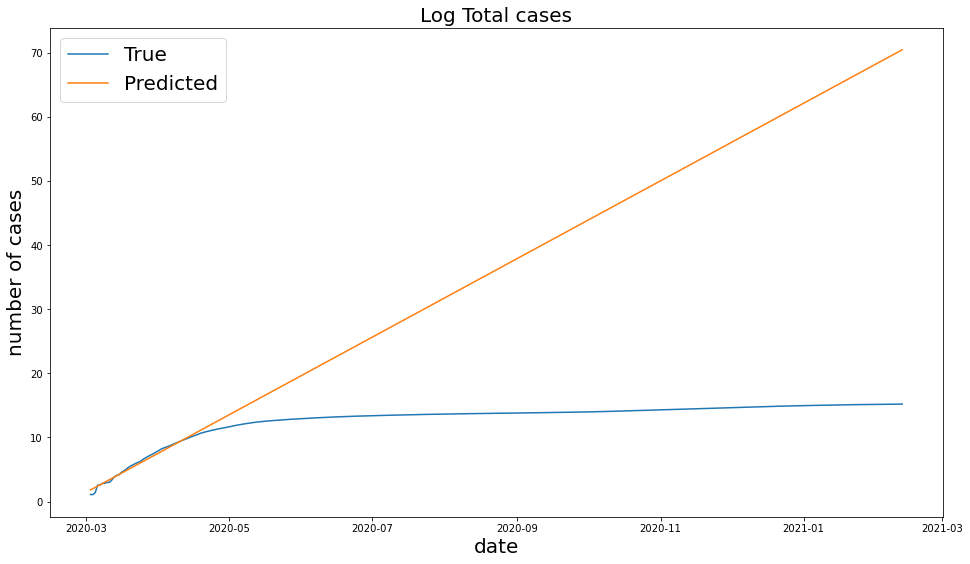

In [23]:
print('MSE train:',mse(lr.predict(X_train),y_train))
print('MSE test:',mse(lr.predict(X_test),y_test))
print('MSE train (in terms of exp): ', mse(np.exp(lr.predict(X_train)),np.exp(y_train)))
print('MSE test (in terms of exp): ', mse(np.exp(lr.predict(X_test)),np.exp(y_test)))
plt.figure(figsize=(16,9))
plt.title('Log Total cases', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(data['date']),np.log(data['total_cases']), label = 'True');
plt.plot(pd.to_datetime(data['date']),lr.predict(X_all), label = 'Predicted')
plt.legend(fontsize = 20);

In [24]:
# xs = np.arange(0, 70, 1)
xs = np.arange(0, 350, 1)
ys = lr.predict(xs.reshape(-1, 1))

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

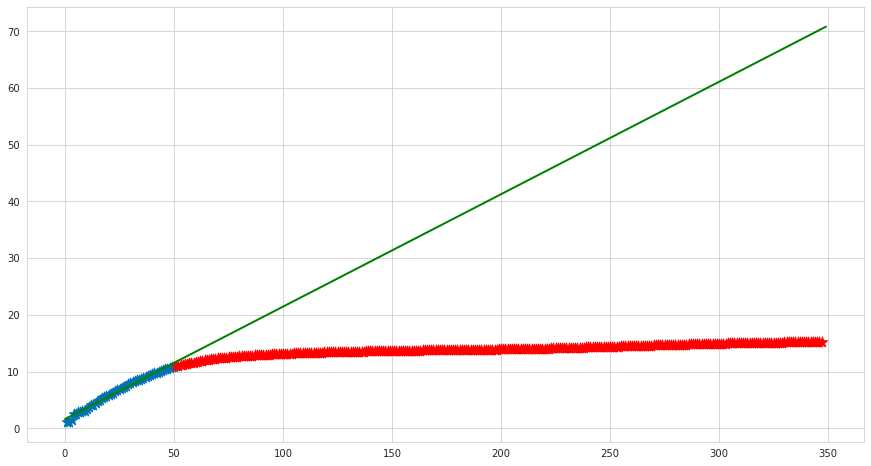

In [26]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, marker='*', s=120)
ax.scatter(X_test, y_test, marker='*', s=120, c='red')
ax.plot(xs, ys, linewidth=2, c='green')

In [27]:
# возведем в экспоненту
y_total_exp = np.exp(w10 * xs + w00)

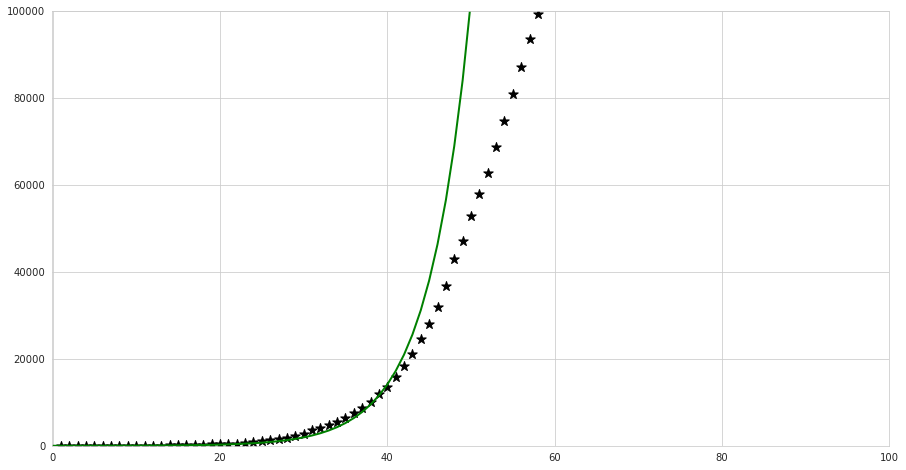

In [28]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.scatter(data['day'], data['total_cases'], marker='*', s=100, c='black')
plt.ylim(-0.01,100000)
plt.xlim(-0.01,100)
ax.plot(xs, y_total_exp, linewidth=2, c='green')

Из графика видно, что на тестовых данных(после 50) модель односторонне завышает результат, то есть экспонента плохо описывает данную зависимость.

In [29]:
N = 500
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

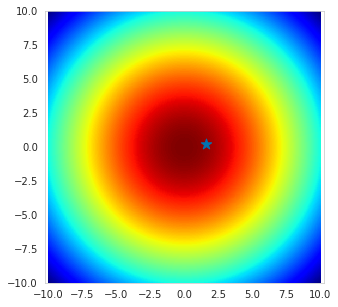

In [30]:
sigma = np.sqrt(mse(lr.predict(X_train),y_train))
w_1 = lr.coef_[0]
w_0 = lr.intercept_

def myplot_heatmap(Z, print_point = True):
    # Make the plot
    plt.axis('equal')
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    if print_point:
        plt.scatter(w_0, w_1, marker='*', s=120)

# априорное распределение параметров w 
cur_mu, cur_sigma = np.array([0, 0]), np.array([[100, 0], [0, 100]])
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(5, 5))
myplot_heatmap(Z)

In [31]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((0, 100000))
    plt.xlim((0, 50))
    if points is not None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

In [32]:
def bayesian_update(mu, sigma, x, y, sigma_noise = sigma):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2))\
                     * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((-0.01, 100000))
    plt.xlim((-0.01, 100))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

def plot_predictions(xs, mu, x):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xlim((-0.01, 100))
    ax.set_ylim((-0.01, 100000))
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.exp(mu[1]*xs + mu[0] - sigma), np.exp(mu[1]*xs + mu[0] + sigma), color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.exp(np.mean(x, axis=0) - np.std(x, axis=0)), np.exp(np.mean(x, axis=0) + np.std(x, axis=0)), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)

mu: 
 [1.09197505 0.00398137]
sigma: 
 [[ 0.60414759 -0.36240025]
 [-0.36240025  0.24174734]]


(-5.0, 5.0)

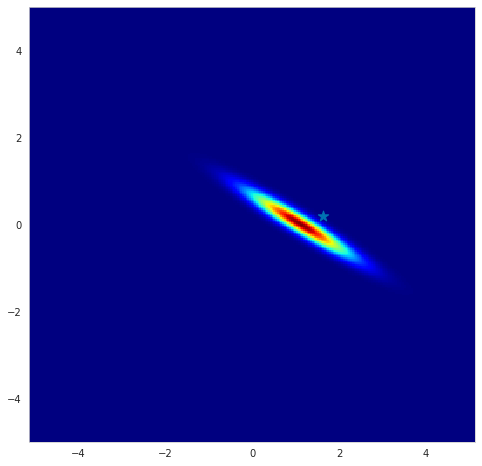

In [33]:
# сделаем пару bayes_update
mu_n, sigma_n = cur_mu, cur_sigma
for i in range(2):
    mu_n, sigma_n = bayesian_update(mu_n, sigma_n, X_train[i,0], y_train.to_numpy()[i])
    
print('mu: \n',mu_n)
print('sigma: \n',sigma_n)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)


# апостериорное распределение параметров (при первых 2ух точках)
Z = multivariate_normal.pdf(pos, mean = mu_n, cov = sigma_n) 
myplot_heatmap(Z, True)
plt.ylim((-5, 5))
plt.xlim((-5, 5))

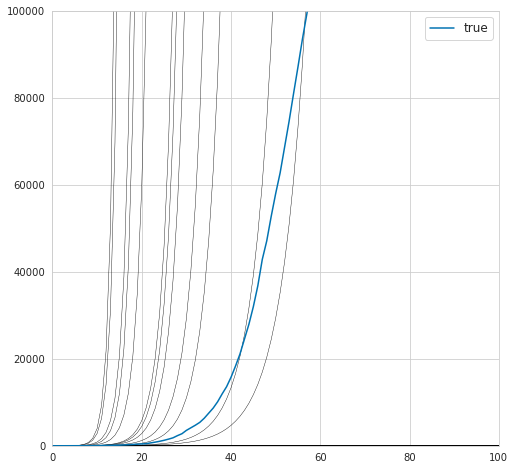

In [34]:
# посемплируем и посмотрим что получется
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.plot(np.arange(len(data)), data['total_cases'], label = 'true')
plt.legend(fontsize = 'large')

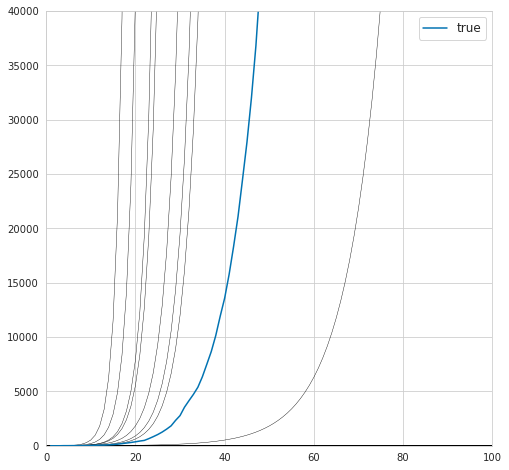

In [35]:
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.ylim(-0.01,40000)
plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
plt.legend(fontsize = 'large')

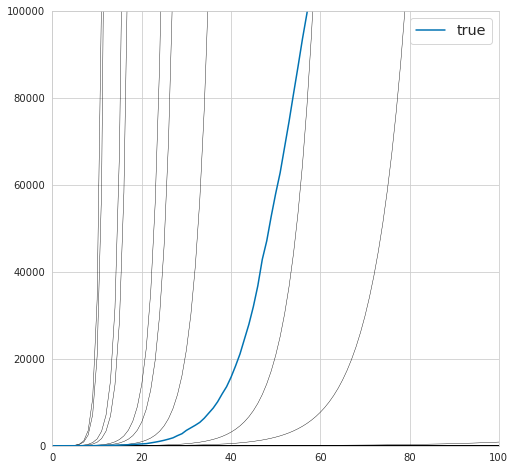

In [36]:
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.plot(np.arange(len(data)), data['total_cases'], label = 'true')
plt.legend(fontsize = 'x-large')

In [37]:
# plot_predictions(xs, mu_n, sample_statistics(mu_n, sigma_n, xs, n=1000))
# plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
# plt.legend(fontsize = 'large')

In [38]:
check1 = [(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-03')).days]
check2 = [(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-03')).days]
check3 = [(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-03')).days]

print('прогноз на 1 мая:', int(np.exp(lr.predict([check1]))[0]))
print('прогноз на 1 июнь:', int(np.exp(lr.predict([check2]))[0]))
print('прогноз на 1 сентября:', int(np.exp(lr.predict([check3]))[0]))

прогноз на 1 мая: 610241
прогноз на 1 июнь: 285179209
прогноз на 1 сентября: 23869843564137116


## Задание 3

In [42]:
from scipy.stats import norm

def predictSigmoid(x, w):
    a = w[0]
    b = w[1]
    c = w[2]
    return np.sqrt(np.pi / np.abs(c)) * np.exp((4 * a * c - b * b) / (4 * c)) *\
    norm.cdf((-2 * c * x - b) / np.sqrt(2 * np.abs(c)))

In [43]:
from datetime import timedelta
final_predict_date = pd.Timestamp(year=2020, month=7, day=1)
n_days = (final_predict_date - train['date'][50733]).days
pred_dates = np.array([train['date'][50733] + timedelta(days=i) for i in range(n_days)])
xs = np.arange(n_days).reshape(-1, 1)
xs = np.concatenate((xs, xs ** 2), axis=1)

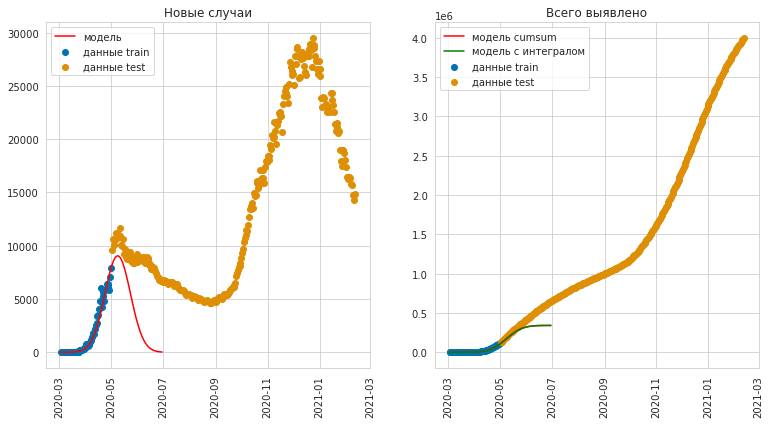

In [44]:
predictions = np.exp(lr2.predict(xs))
predictions_total_cumsum = np.cumsum(predictions)
w = np.array([lr2.intercept_] + list(lr2.coef_))
predictions_total_integral = predictSigmoid(xs[:,0], w)
plt.figure(figsize=(12, 6))
plt.subplots_adjust(right=0.95, bottom=0.1, top=0.9)
ax = plt.subplot(121)
plt.scatter(train.date, train.new_cases, label='данные train')
plt.scatter(test.date, test.new_cases, label='данные test')
plt.plot(pred_dates, predictions, 
         color='r', label='модель')
plt.xticks(rotation=90) 
plt.title('Новые случаи')
plt.legend()
ax = plt.subplot(122)
plt.scatter(train.date, train.total_cases, label='данные train')
plt.scatter(test.date, test.total_cases, label='данные test')
plt.plot(pred_dates, predictions_total_cumsum, 
         color='r', label='модель cumsum')
plt.plot(pred_dates, predictions_total_integral, 
         color='g', label='модель с интегралом')
plt.xticks(rotation=90) 
plt.title('Всего выявлено')
plt.legend()
plt.show()

In [136]:
first_try = df[df['location'] == country][['date', 'total_cases', 'new_cases']]
first_try = first_try[first_try['total_cases'] >= 3]
first_try['day_number'] = np.arange(1, len(first_try)+1)
a = np.array(first_try['total_cases']).reshape(-1, 1)
b = np.array(first_try['day_number']).reshape(-1, 1)
model = LinearRegression()
model.fit(b, a)

LinearRegression()

### Задание 4

In [46]:
China = df[df['location']=='China'][['date','new_cases','total_cases']]

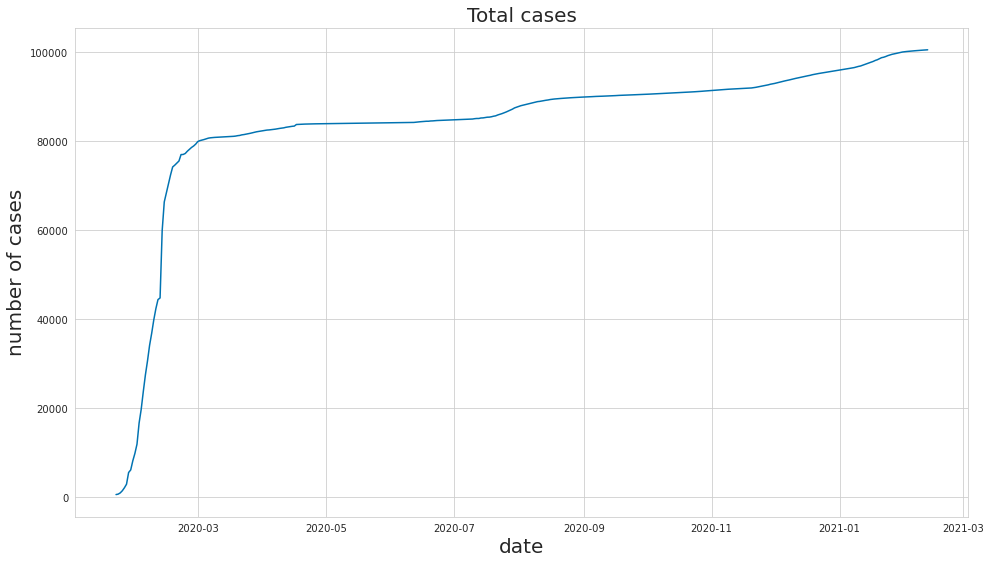

In [47]:
plt.figure(figsize=(16,9))
plt.title('Total cases', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(China['date']),China['total_cases']);

In [106]:
train = China[:70]
test = China[70:]

In [107]:
test = test.fillna(y_test.mean())
train = train.fillna(train.mean())

<ipython-input-107-836b0b5e5b1a>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train = train.fillna(train.mean())


In [108]:
y_train = np.log(train['new_cases']).apply(lambda x: max(x,0))
y_test = np.log(test['new_cases']).apply(lambda x: max(x,0))
X_train = pd.to_datetime(train['date'])-pd.to_datetime('2019-12-31')
X_train = np.array([X_train.apply(lambda x: x.days),X_train.apply(lambda x: x.days ** 2)]).T
X_test = pd.to_datetime(test['date'])-pd.to_datetime('2019-12-31')
X_test = np.array([X_test.apply(lambda x: x.days), X_test.apply(lambda x: x.days ** 2)]).T
X_all = np.concatenate([X_train,X_test], axis = 0)
y_all = np.concatenate([y_train,y_test], axis = 0)

/home/dm/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/dm/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [109]:
y_test=y_test.fillna(y_test.mean())

In [110]:
linear_regression = LinearRegression().fit(X_train,y_train)

MSE train: 1.396495712327952
MSE test: 1183.7639557547138


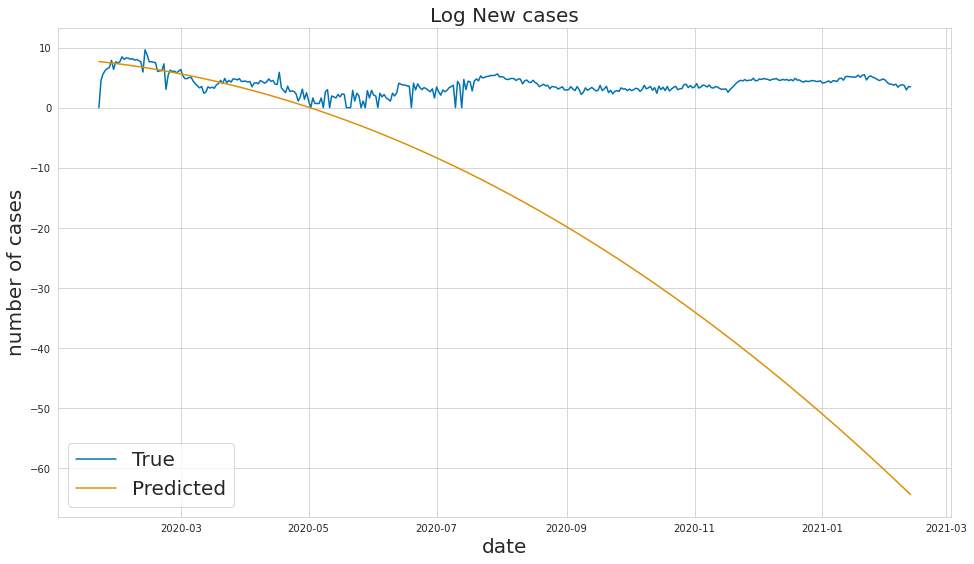

In [111]:
print('MSE train:',mse(linear_regression.predict(X_train),y_train))
print('MSE test:',mse(linear_regression.predict(X_test),y_test))
plt.figure(figsize=(16,9))
plt.title('Log New cases', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(China['date']),np.log(China['new_cases'].apply(lambda x: max(1,x))), label = 'True')
plt.plot(pd.to_datetime(China['date']),linear_regression.predict(X_all), label = 'Predicted')
plt.legend(fontsize = 20);

### Задание 5

По итогам моделирования можно сказать, что сигмоида в целом похожа на график распространения вируса и может использоваться для предсказания количества выявленных случаев. Тем не менее такая модель не учитывает и не включает в свои параметры принятые меры, например введение карантина, а также особенности вируса вроде среднего числа заражённых от одного больного. Это затрудняет анализ последствий принятия различных мер.